In [1]:
import json
import numpy as np
import pandas as pd
import requests
import re
import itertools
import time
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pickle
from bs4 import BeautifulSoup
from datetime import datetime
from collections import Counter

In [3]:
#################### START FROM HERE ####################

In [4]:
# I will get data in 3 stages
# In the first stage, I will get appid of all game from steam
# In the second stage, I will get details of those all games from appid
# In the third stage, I will get dates of games by web-scraping

In [5]:
# Start of first stage

In [3]:
# Create empty list to store app id
appid_list =[]

In [4]:
url = "https://steamspy.com/api.php?request=all&page="

In [5]:
# Iterate to 1,000 pages as we don't know how many games are present on steam
# Then store app id in 'appid_list'

for page in range(0, 1000):
    response_data = requests.get((url + str(page)))
    data = pd.DataFrame.from_dict(response_data.json(), orient='index')
    appid_list.extend(data['appid'].to_list())

In [ ]:
# Temporarily storing this file for future use
with open('appid_list', 'wb') as f:
    pickle.dump(appid_list,f)

In [ ]:
# By checking the appid_list length, I found there are 46101 games

In [12]:
### End of first stage

In [13]:
### Start of second stage

In [14]:
# Now checking the app details
url_1 = "https://steamspy.com/api.php?request=appdetails&appid="

In [15]:
games_data = pd.DataFrame()

In [17]:
for appid in appid_list:
    response_data = requests.get((url_1 + str(appid)))
    data_1 = pd.DataFrame.from_dict(response_data.json())
    games_data = games_data.append(data_1.head(1))
    time.sleep(1.2)
    
# time.sleep(1.2) will pause the execution for 1.2 seconds

In [ ]:
### End of second stage

In [ ]:
### Start of third stage

In [ ]:
# Web-scraping date of release 
url_3= "https://store.steampowered.com/app/"

In [ ]:
for i in range(len(games_data)):
    page = requests.get((url_3 + str(games_data.loc[i]['appid']) + str('/')))
    soup = BeautifulSoup(page.content, 'html.parser')
    release_date = soup.find("div", class_="date")
    try:
        games_data.loc[i]['date_of_release'] = release_date.text
    except:
        games_data.loc[i]['date_of_release'] = np.NaN

In [744]:
# Creating 3 more columns which will strore day, month and year of release
games_data['day_of_release'] = np.nan
games_data['month_of_release'] = np.nan
games_data['year_of_release'] = np.nan

In [745]:
# Storing the values in day_of_release, month_of_release and year_of_release
# For the games which don't have 'date_of_release', I will store 0
for i in range(len(games_data)):
    try:
        datetime_object = datetime.strptime(str(games_data.at[i, 'date_of_release']), '%d %b, %Y')
        games_data.at[i, 'day_of_release'] = int(datetime_object.day)
        games_data.at[i, 'month_of_release'] = int(datetime_object.month)
        games_data.at[i, 'year_of_release'] = int(datetime_object.year)
    except:
        games_data.at[i, 'day_of_release'] = 0
        games_data.at[i, 'month_of_release'] = 0
        games_data.at[i, 'year_of_release'] = 0

In [746]:
# converting all 3 columns to int
games_data['day_of_release']   = games_data['day_of_release'].astype(int) 
games_data['month_of_release'] = games_data['month_of_release'].astype(int)
games_data['year_of_release']  = games_data['year_of_release'].astype(int)

In [ ]:
### End of third stage

In [614]:
# Saving the games_data for future use
os.chdir('E:\\Analytics\\Steam Data')
games_data.to_csv('games_data.csv', index= False)

In [ ]:
#### DATA EXTRACTION TILL HERE ####

In [ ]:
#### EXPLORATORY DATA ANALYSIS FROM HERE  ####

In [21]:
# Changing the current directory
os.chdir('E:\\Analytics\\Steam Data')

In [22]:
# Loading the games_data file into dataframe
games_data = pd.read_csv('games_data.csv')

In [23]:
# Checking the top 5 rows of games_data
games_data.head(5)

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,...,initialprice,discount,ccu,languages,genre,tags,date_of_release,day_of_release,month_of_release,year_of_release
0,570,Dota 2,Valve,Valve,NaN,1311073,250492,0,"100,000,000 .. 200,000,000",36738,...,0.0,0.0,518429,"English, Bulgarian, Czech, Danish, Dutch, Finn...","Action, Free to Play, Strategy","{'Free to Play': 58005, 'MOBA': 19254, 'Multip...","9 Jul, 2013",9,7,2013
1,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,NaN,5164509,698131,0,"50,000,000 .. 100,000,000",28975,...,0.0,0.0,643583,"English, Czech, Danish, Dutch, Finnish, French...","Action, Free to Play","{'FPS': 86792, 'Shooter': 62264, 'Multiplayer'...","21 Aug, 2012",21,8,2012
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",NaN,998442,822166,0,"50,000,000 .. 100,000,000",24605,...,2999.0,0.0,182547,"English, Korean, Simplified Chinese, French, G...","Action, Adventure, Massively Multiplayer","{'Survival': 13459, 'Shooter': 11245, 'Multipl...","21 Dec, 2017",21,12,2017
3,440,Team Fortress 2,Valve,Valve,NaN,758302,50533,0,"50,000,000 .. 100,000,000",7569,...,0.0,0.0,97380,"English, Danish, Dutch, Finnish, French, Germa...","Action, Free to Play","{'Free to Play': 61097, 'Hero Shooter': 60396,...","10 Oct, 2007",10,10,2007
4,304930,Unturned,Smartly Dressed Games,Smartly Dressed Games,NaN,410378,38733,0,"20,000,000 .. 50,000,000",7128,...,0.0,0.0,28253,English,"Action, Adventure, Casual, Free to Play, Indie","{'Free to Play': 36064, 'Survival': 15766, 'Zo...","7 Jul, 2017",7,7,2017


In [24]:
#To make the data more readable, I will change the labels of 'month_of_release'

month_labels ={ 0 : np.nan,
                1 : 'Jan',
                2 : 'Feb',
                3 : 'Mar',
                4 : 'Apr',
                5 : 'May',
                6 : 'June',
                7 : 'July',
                8 : 'Aug',
                9 : 'Sept',
                10: 'Oct',
                11: 'Nov',
                12 :'Dec',
                 }

In [25]:
# Assign proper labels for 'month_of_release'
games_data['month_of_release'] = games_data['month_of_release'].map(month_labels)

In [26]:
# Checking the structure of games_data
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46101 entries, 0 to 46100
Data columns (total 24 columns):
appid               46101 non-null int64
name                46091 non-null object
developer           45900 non-null object
publisher           45935 non-null object
score_rank          46 non-null float64
positive            46101 non-null int64
negative            46101 non-null int64
userscore           46101 non-null int64
owners              46101 non-null object
average_forever     46101 non-null int64
average_2weeks      46101 non-null int64
median_forever      46101 non-null int64
median_2weeks       46101 non-null int64
price               46073 non-null float64
initialprice        46080 non-null float64
discount            46080 non-null float64
ccu                 46101 non-null int64
languages           46021 non-null object
genre               45869 non-null object
tags                46101 non-null object
date_of_release     45913 non-null object
day_of_release   

In [27]:
# Checking the 'score_rank' column
games_data['score_rank'].value_counts(dropna= False)

NaN      46055
98.0        15
99.0        14
100.0       12
97.0         5
Name: score_rank, dtype: int64

In [28]:
# Since there are 46055 null values for 'score_rank', I will remove this column
del games_data['score_rank']

In [29]:
# Checking the 'userscore' column
games_data['userscore'].value_counts()

0      46055
100        4
95         3
46         2
68         2
80         2
70         2
69         2
51         2
84         2
94         2
76         1
67         1
98         1
97         1
65         1
96         1
71         1
73         1
74         1
61         1
77         1
92         1
63         1
81         1
82         1
53         1
55         1
87         1
88         1
57         1
59         1
60         1
78         1
Name: userscore, dtype: int64

In [30]:
# Similarly with 'userscore', there are 46055 games which don't have any score 
# So, I will remove 'userscore' column 
del games_data['userscore']

In [31]:
# Total number of games
games_data['appid'].nunique()

46101

# Number of unique games in dataset = 46,101

In [32]:
# Total number of name
games_data['name'].nunique()

45907

In [33]:
# Checking values of name
games_data['name'].value_counts()

Lost                4
Aurora              4
none                3
Arena               3
Hide and Seek       3
                   ..
Exowar              1
BLASK               1
Going Medieval      1
Game Dev Company    1
Night Call          1
Name: name, Length: 45907, dtype: int64

In [34]:
# There are 4 games wich have same name , i.e., Aurora
# Checking if they are same game
print(games_data.loc[games_data['name'] == 'Aurora'])

         appid    name                  developer                  publisher  \
23592   973260  Aurora          Pink Kong Studios          Pink Kong Studios   
24608   789720  Aurora            Nicholas Turner            Nicholas Turner   
33733  1382380  Aurora  Michel Coelho da Silveira  Michel Coelho da Silveira   
45385  1422610  Aurora             BambuseaeGames             BambuseaeGames   

       positive  negative            owners  average_forever  average_2weeks  \
23592         1         2       0 .. 20,000                0               0   
24608         3         0       0 .. 20,000                0               0   
33733         4         0       0 .. 20,000                0               0   
45385       298        62  20,000 .. 50,000                0               0   

       median_forever  ...  initialprice  discount  ccu  \
23592               0  ...         299.0       0.0    0   
24608               0  ...         199.0       0.0    0   
33733               0

In [ ]:
# appid, developer and publisher are different for those 4 games named 'Aurora',
# this means they are different games 

In [35]:
# Checking the 'owners' column values
games_data['owners'].value_counts()

0 .. 20,000                   31897
20,000 .. 50,000               5636
50,000 .. 100,000              2945
100,000 .. 200,000             2092
200,000 .. 500,000             1855
500,000 .. 1,000,000            804
1,000,000 .. 2,000,000          456
2,000,000 .. 5,000,000          288
5,000,000 .. 10,000,000          76
10,000,000 .. 20,000,000         32
20,000,000 .. 50,000,000         16
50,000,000 .. 100,000,000         3
100,000,000 .. 200,000,000        1
Name: owners, dtype: int64

In [36]:
#To make the data more readable, I will change the labels of 'owners'

owner_labels ={ '0 .. 20,000'          : '0 to 20k',
                '20,000 .. 50,000'     : '20k to 50k',
                '50,000 .. 100,000'    : '50k to 100k',
                '100,000 .. 200,000'   : '100k to 200k',
                '200,000 .. 500,000'   : '200k to 500k',
                '500,000 .. 1,000,000' : '500k to 1 mil',
                '1,000,000 .. 2,000,000' : '1 mil to 2 mil',
                '2,000,000 .. 5,000,000' : '2 mil to 5 mil',
                '5,000,000 .. 10,000,000': '5 mil to 10 mil',
                '10,000,000 .. 20,000,000'   : '10 mil to 20 mil',
                '20,000,000 .. 50,000,000'   : '20 mil to 50 mil',
                '50,000,000 .. 100,000,000'  : '50 mil to 100 mil',             
                '100,000,000 .. 200,000,000' : '100 mil to 200 mil',        
                 }

In [37]:
games_data['owners'] = games_data['owners'].map(owner_labels)

In [38]:
# Checking the 'owners' column values again with changed labels
games_data['owners'].value_counts()

0 to 20k              31897
20k to 50k             5636
50k to 100k            2945
100k to 200k           2092
200k to 500k           1855
500k to 1 mil           804
1 mil to 2 mil          456
2 mil to 5 mil          288
5 mil to 10 mil          76
10 mil to 20 mil         32
20 mil to 50 mil         16
50 mil to 100 mil         3
100 mil to 200 mil        1
Name: owners, dtype: int64

In [39]:
# Checking the % of games owned
games_data.owners.value_counts(normalize=True)

0 to 20k              0.691894
20k to 50k            0.122253
50k to 100k           0.063881
100k to 200k          0.045379
200k to 500k          0.040238
500k to 1 mil         0.017440
1 mil to 2 mil        0.009891
2 mil to 5 mil        0.006247
5 mil to 10 mil       0.001649
10 mil to 20 mil      0.000694
20 mil to 50 mil      0.000347
50 mil to 100 mil     0.000065
100 mil to 200 mil    0.000022
Name: owners, dtype: float64

# 69.18% of games are owned by 0 to 20k players

# 0.98% ~ 1% of games are owned by 1 mil to 2 mil players

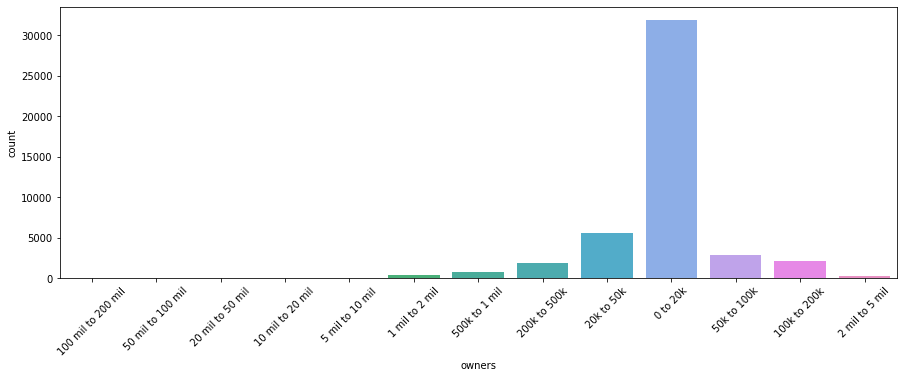

In [40]:
# Countplot of 'owners'
plt.figure( figsize= (15,5) )
plt.xticks(rotation=45)
sns.countplot(games_data['owners'])

In [531]:
# Checking 'developer'

In [41]:
# Number of unique developer 
games_data['developer'].nunique()

28920

In [42]:
# Checking the top 10 developers
games_data['developer'].value_counts(dropna= False).nlargest(11)

NaN                           201
Choice of Games               119
Creobit                        87
Laush Dmitriy Sergeevich       85
Sokpop Collective              84
KOEI TECMO GAMES CO., LTD.     83
Hosted Games                   68
Boogygames Studios             66
Blender Games                  66
Elephant Games                 58
RewindApp                      58
Name: developer, dtype: int64

# Choice of Games is the biggest developer on steam

In [ ]:
# There are 201 games for which developer data is not given

In [532]:
# Checking 'publisher'

In [43]:
# Number of unique publisher 
games_data['publisher'].nunique()

24738

In [44]:
# Checking the top 10 publisher
games_data['publisher'].value_counts(dropna= False).nlargest(11)

Big Fish Games     391
NaN                166
Strategy First     148
8floor             136
Square Enix        129
Ubisoft            126
Choice of Games    119
Sekai Project      118
THQ Nordic         116
HH-Games           112
SEGA               104
Name: publisher, dtype: int64

# Big Fish Games is the biggest publisher on steam

In [ ]:
# There are 166 games for which publisher data is not given

In [45]:
# checking the 'positive' column
games_data['positive'].describe()

count    4.610100e+04
mean     1.396507e+03
std      2.902029e+04
min      0.000000e+00
25%      5.000000e+00
50%      2.000000e+01
75%      1.180000e+02
max      5.164509e+06
Name: positive, dtype: float64

In [370]:
# minimum value in 'positive' column = 0
# This means there games for which no one has given positive reviews

In [46]:
# Checking the 'negative' column
games_data['negative'].describe()

count     46101.000000
mean        231.081235
std        5542.087954
min           0.000000
25%           1.000000
50%           7.000000
75%          36.000000
max      822166.000000
Name: negative, dtype: float64

In [ ]:
# minimum value in 'negative' column = 0
# This means there games for which no one has given negative reviews

In [47]:
# Creating a new column 'positive_percent' which will show % of positive reviews to total reviews
# positive_percent = positive/ ( positive+ negative )

# Assigning 0 to 'positive_percent'
games_data['positive_percent'] = 0

In [48]:
# There could be games for which positive and negative both are 0
# Defining filter for this condition
filt = (games_data['positive']==0) & (games_data['negative']==0)

In [49]:
# Assigning values of 'positive_percent' based on above equation
games_data.loc[~filt,'positive_percent'] = games_data.loc[~filt,'positive'] / (games_data.loc[~filt,'positive']+ games_data.loc[~filt,'negative'])

In [50]:
# The value of 'positive_percent' will range from 0 to 1

# Checking the 'positive_percent' column
games_data['positive_percent'].describe()

count    46101.000000
mean         0.724124
std          0.249898
min          0.000000
25%          0.600000
50%          0.785714
75%          0.916667
max          1.000000
Name: positive_percent, dtype: float64

<Figure size 432x288 with 0 Axes>

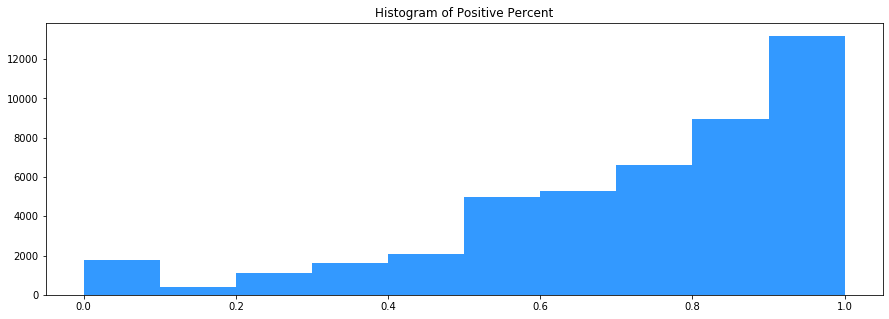

In [51]:
# Plotting histogram of 'positive_percent'
plt.clf()
plt.figure( figsize= (15,5) )
plt.hist(games_data['positive_percent'], bins= 10, color ='#3399ff')
plt.title('Histogram of Positive Percent')
plt.show()

# Median positive percent for all games on steam is 0.78

In [ ]:
### Price of games

In [52]:
# Checking the number of null values in 'price'
games_data['price'].isnull().sum()

28

In [53]:
# Number of null values in 'price' = 28

# When price is null value, imputing it with 0.001
# Since price is given in cents, 0.001 is a very small value which will not have 
games_data['price'] = np.where(games_data['price'].isnull(), 0.001, games_data['price'])

In [54]:
# 'price' is given as float, so converting it to int
games_data['price'] = games_data['price'].apply(lambda x: int(x or 0))

In [55]:
# Also, 'price' is given in cents
# I will divide it by 100 to get 'price' in US dollars
games_data['price'] = games_data['price']/100

In [56]:
# Checking the 'price' column
games_data['price'].describe()

count    46101.000000
mean         7.482190
std         10.984714
min          0.000000
25%          0.990000
50%          4.990000
75%          9.990000
max        999.000000
Name: price, dtype: float64

In [474]:
# minimum price of games = 0; this means they are free to play games
# maximum price of games = USD 999

# Median price of games on steam = USD 4.99 ~ USD 5

In [57]:
# checking the number of free to play games on steam
len(games_data[games_data['price']==0])

7132

In [58]:
# Total number of games on steam = 46101

# % of free to play games on steam = (7132/46101)*100
#                                  = 15.47%

# 15.47% of all games on steam are free to play games 

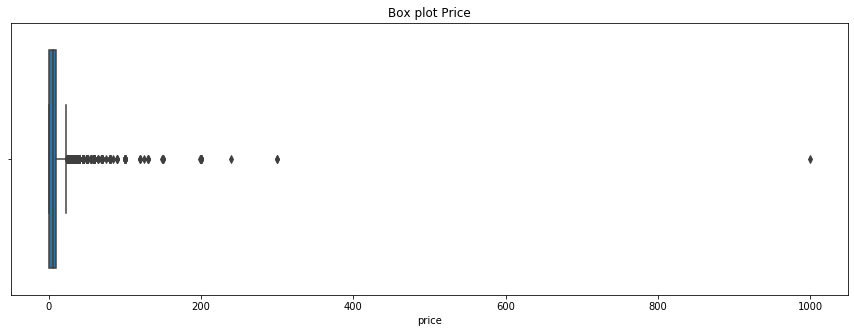

In [59]:
# Plotting boxplot of 'price'
plt.figure( figsize= (15,5) )
sns.boxplot(games_data['price'])
plt.title('Box plot Price')
plt.show()

In [ ]:
# Above boxplot shows that there are outliers in price
# Taking the lower bound as 0
# And the upper bound as Q3 + 1.5*IQR values of price

In [60]:
price = games_data['price']

In [61]:
# Finding Inter quartile range
iqr = np.subtract(*np.percentile(price, [75, 25]))
iqr

9.0

In [62]:
# Finding Q3 + 1.5*IQR
print(np.percentile(price, 75) + (1.5*iqr))

23.490000000000002


In [63]:
# checking stats for price between 0 and 23.5 USD
games_data.loc[(games_data['price']>0) & (games_data['price']<23.5) ,'price'].describe()

count    36760.000000
mean         7.085319
std          5.450912
min          0.490000
25%          2.990000
50%          4.990000
75%          9.990000
max         22.990000
Name: price, dtype: float64

<Figure size 432x288 with 0 Axes>

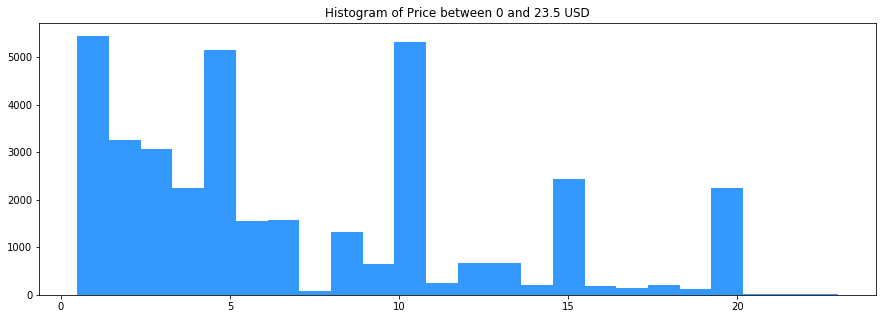

In [64]:
# Plotting histogram of 'price'
plt.clf()
plt.figure( figsize= (15,5) )
plt.hist(games_data.loc[(games_data['price']>0) & (games_data['price']<23.5),'price'], bins= 24, color ='#3399ff')
plt.title('Histogram of Price between 0 and 23.5 USD')
plt.show()

# There are specific price points for games on steam which are 1, 5, 10, 15, 20 USD

# Nearly 5200 number of games are priced at 1, 5 and 10 USD

In [65]:
# Hypothesis: Free to play games are owned by more number of players as compared to paid games
# To check the above hypothesis, I will subset the entire dataset into 2 parts
# First part will have owners of free-to-play games 
# Second part will have owners of paid-games

games_FTP_owners = games_data[['price','owners']]
games_FTP_owners = games_FTP_owners[games_FTP_owners['price']==0]

games_paid_owners = games_data[['price','owners']]
games_paid_owners = games_paid_owners[games_paid_owners['price']!=0]

In [801]:
# Since there are more paid-games as compared to free-to-play games, I will normalize the data
# This will show proper comparison of owners for paid games vs free-to-play games

In [66]:
# owners of free-to-play games
games_FTP_owners['owners'].value_counts(normalize=True)

0 to 20k              0.530566
20k to 50k            0.178491
50k to 100k           0.099832
100k to 200k          0.070667
200k to 500k          0.059030
500k to 1 mil         0.027902
1 mil to 2 mil        0.016265
2 mil to 5 mil        0.010656
5 mil to 10 mil       0.003365
10 mil to 20 mil      0.001683
20 mil to 50 mil      0.001122
50 mil to 100 mil     0.000280
100 mil to 200 mil    0.000140
Name: owners, dtype: float64

In [67]:
# owners of paid-games
games_paid_owners['owners'].value_counts(normalize=True)

0 to 20k             0.721420
20k to 50k           0.111961
50k to 100k          0.057302
100k to 200k         0.040750
200k to 500k         0.036798
500k to 1 mil        0.015525
1 mil to 2 mil       0.008725
2 mil to 5 mil       0.005440
5 mil to 10 mil      0.001334
10 mil to 20 mil     0.000513
20 mil to 50 mil     0.000205
50 mil to 100 mil    0.000026
Name: owners, dtype: float64

In [803]:
# For free-to-play games
# 53% of free-to-play games are owned by less than 20k players
# 9.9% ~ 10% of free-to-play games are owned by 50k to 100k players
# 1% of free-to-play games are owned by 2 mil to 5 mil players 


# Adding all the values for categories between (1 mil to 2 mil) and (50 mil to 100 mil)
### 3.35% of free-to-play games are played by more than 1 mil players

In [804]:
# For paid games
# 72% of paid games are owned by less than 20k players
# 11.1% of paid games are owned by 20k to 50k players
# 1.5% of paid games are owned by 500k to 1 mil players 


# Adding all the values for categories between (1 mil to 2 mil) and (50 mil to 100 mil)
### 1.3% of paid games are played by more than 1 mil players

# When player base is less than 20k, more players are playing paid games

# But as player base crosses 1 mil, more players are playing free-to-play-games

In [68]:
# Checking the median price for biggest publisher, i.e, 'Big Fish Games'
games_data[games_data['publisher']=='Big Fish Games'].price.median()

9.99

# Median price for Big Fish Games (biggest publisher) is USD 9.99

In [69]:
# Checking the median price for biggest developer, i.e, 'Choice of Games'
games_data[games_data['publisher']=='Choice of Games'].price.median()

4.99

# Median price for Choice of Games (biggest developer) is USD 4.99

In [ ]:
### Time spent on playing

In [383]:
# There are 4 columns related to playtime, they are:
# 1. 'average_forever'
# 2. 'average_2weeks'
# 3. 'median_forever'
# 4. 'median_2weeks'

In [384]:
# 1. 'average_forever'
# Hypothesis: When a game is recently launched, 'average_forever' is high, but reduces with time after launch
# We don't have relevant data to test this hypothesis
# Hence, I will not take 'average_forever' to analyze the time spent on playing

In [385]:
# 2. 'average_2weeks'
# Applying similar logic as given for 'average_forever'
# I will not take 'average_2weeks' to analyze the time spent on playing

In [386]:
# 3. 'median_forever'
# Seems like the most relevant out of above 4 columns to analyze playtime of games

In [70]:
# I will delete other 3 columns related to playtime
del games_data['average_forever']
del games_data['average_2weeks']
del games_data['median_2weeks']

In [71]:
# Checking the stats for 'median_forever'
games_data['median_forever'].describe()

count     46101.000000
mean        142.421271
std        2570.410093
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      428228.000000
Name: median_forever, dtype: float64

In [72]:
# minimum value of 'median_forever' = 0, this means that players are not actively playing these games
# Checking the number of games which have 'median_forever' = 0
len(games_data[games_data['median_forever']==0])

34742

In [53]:
# Total number of games = 46101
# Total number of games with 0 'median_forever' = 34742

# % of games on which players are not active = (34742 / 46101)*100
#                                            = 75.36%

# Players are not active on 75.36% of games

In [73]:
# Now, checking games with 'median_forever' >0
median_forever_active_players = games_data['median_forever']
median_forever_active_players = median_forever_active_players[median_forever_active_players>0]

In [74]:
# Checking stats for 'median_forever' >0 
median_forever_active_players.describe()

count     11359.000000
mean        578.022977
std        5154.105288
min           1.000000
25%          67.000000
50%         202.000000
75%         348.000000
max      428228.000000
Name: median_forever, dtype: float64

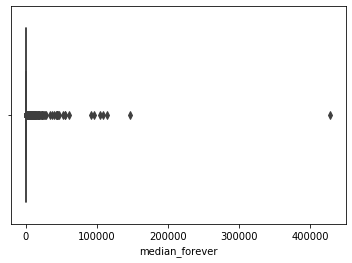

In [75]:
# Checking boxplot for outliers
sns.boxplot(median_forever_active_players)

In [57]:
# There are handful of games which have 'median_forever' around 100,000 minutes
# Now, a 'median_forever' value of 60,000 minutes means, the game has overall median playtime of 1,000 hours
# Further splitting the 'median_forever' with values < 60,000 minutes

In [76]:
# 'median_forever' < 60,000 minutes
median_forever_active_players_1 = median_forever_active_players[median_forever_active_players<60000]
median_forever_active_players_1.describe()

count    11351.000000
mean       477.110475
std       1904.793891
min          1.000000
25%         67.000000
50%        201.000000
75%        347.000000
max      54858.000000
Name: median_forever, dtype: float64

In [814]:
# There are 11,351 games with median playtime between 0 and 1,000 hours
# Also, Q1 for above distribution is 67 min
# So, I will check the number of games which have 'median_forever' between 0 and 60 minutes

In [77]:
# Number of games which have median playtime of less than 60 minutes
len(median_forever_active_players_1[median_forever_active_players_1<=60])

2678

In [61]:
# Total number of active games = 11358
# Number of games which have median playtime of less than 60 minutes = 2678

# % of games which have less than 60 minutes median playtime = (2678/11358)*100
#                                                            = 23.57%

# 23.57% of active games have less than 1 hour of median playtime

In [78]:
# 'median_forever' with values > 60,000 minutes
median_forever_active_players_2 = median_forever_active_players[median_forever_active_players>=60000]

In [79]:
# 'median_forever' >= 60,000 minutes
median_forever_active_players_2.describe()

count         8.000000
mean     143760.250000
std      117362.503131
min       61106.000000
25%       95108.000000
50%      106378.000000
75%      122007.000000
max      428228.000000
Name: median_forever, dtype: float64

In [80]:
# Checking the data for 8 games with highest 'median_forever' values
top_8_median_forever = games_data.nlargest(8,'median_forever')

In [81]:
top_8_median_forever[['appid', 'name','developer','publisher', 'owners','median_forever',
                      'price', 'genre', 'date_of_release' ]]

,appid,name,developer,publisher,owners,median_forever,price,genre,date_of_release
36755,685310,Transport Defender,Coconut Shavers,Coconut Shavers,100k to 200k,428228,0.00,"Casual, Free to Play, Strategy","11 Sep, 2017"
10029,1013320,Firestone Idle RPG,Holyday Studios,Holyday Studios,200k to 500k,146052,0.00,"Adventure, Free to Play, Indie, RPG, Early Access","26 Sep, 2019"
40438,524660,RutonyChat,Rutony Studio,Rutony Studio,100k to 200k,113992,14.99,"Animation & Modeling, Design & Illustration, U...","19 Sep, 2016"
45180,479100,Music Wars Empire,Antuan Johnson,Music Wars,20k to 50k,108634,14.99,"Indie, Simulation, Strategy","1 Jun, 2016"
21127,892420,懒人修仙传,托更的修罗,托更的修罗,200k to 500k,104122,3.99,"Casual, Indie, RPG, Simulation","15 Nov, 2018"
16744,2800,X2: The Threat,Egosoft,Egosoft,200k to 500k,96242,4.99,Strategy,"3 Dec, 2003"
41153,1283970,YoloMouse,Dragonrise Games,Dragonrise Games,100k to 200k,91706,3.99,"Animation & Modeling, Design & Illustration, E...","1 May, 2020"
42733,1173510,XSOverlay,Xiexe,Xiexe,50k to 100k,61106,9.99,"Utilities, Early Access","3 Mar, 2020"


In [821]:
# Observations for above
# All games have owners less than 500k
# 2 out of 8 are free-to-play games
# YoloMouse is actually not a game

In [ ]:
### Date of Release

In [82]:
# Defining peroper order of months
month_order = [ 'Jan', 'Feb',  'Mar', 'Apr', 'May', 'June','July', 'Aug', 'Sept','Oct', 'Nov','Dec']

Text(0.5, 1.0, 'Countplot for Month of Release')

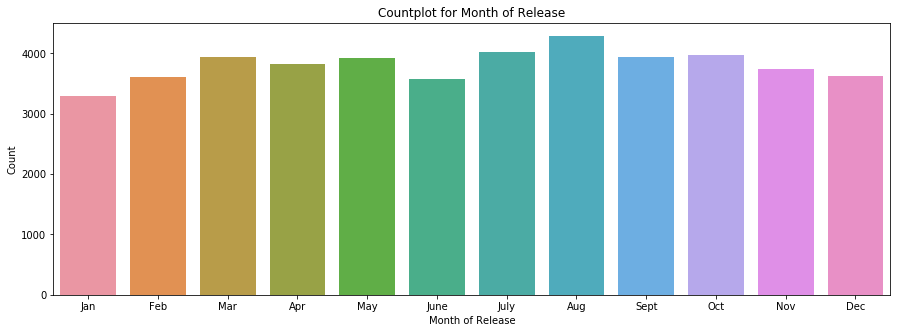

In [83]:
# Countplot of 'month_of_release'
plt.figure(figsize= (15,5))
sns.countplot(games_data['month_of_release'] , order = month_order )
plt.xlabel('Month of Release')
plt.ylabel('Count')
plt.title('Countplot for Month of Release')

# Maximum number of games are released in month of August

# The difference between games released in August and July (2nd highest) is not significantly large

# Release of games are spread evenly across all months 

In [ ]:
# Year of release

In [84]:
release_year = games_data['year_of_release']

In [85]:
# Checking value counts of year
release_year.value_counts()

2020    8390
2018    7558
2019    6928
2021    5928
2017    5902
2016    4150
2015    2395
2014    1317
2013     562
2012     433
2011     331
0        330
2010     268
2009     260
2008     195
2007     153
2006     146
2005      94
2003      91
2004      76
2001      63
1999      58
1998      58
2002      54
2000      51
1997      47
1996      43
1994      43
1995      38
1993      27
1990      23
1992      18
1989      14
1988      14
1991      14
2022       8
1987       6
1986       5
2024       3
1985       2
1984       2
2023       1
1983       1
1970       1
Name: year_of_release, dtype: int64

In [86]:
# To make the data more readable, I will analyze the games released for only last 21 years

# I will convert all years before 2000 to 1999
release_year = np.where(release_year <2000, 1999, release_year)

# And all the years after 2021 to 2022
release_year = np.where(release_year >2021, 2022, release_year)

Text(0.5, 1.0, 'Countplot for Year of Release')

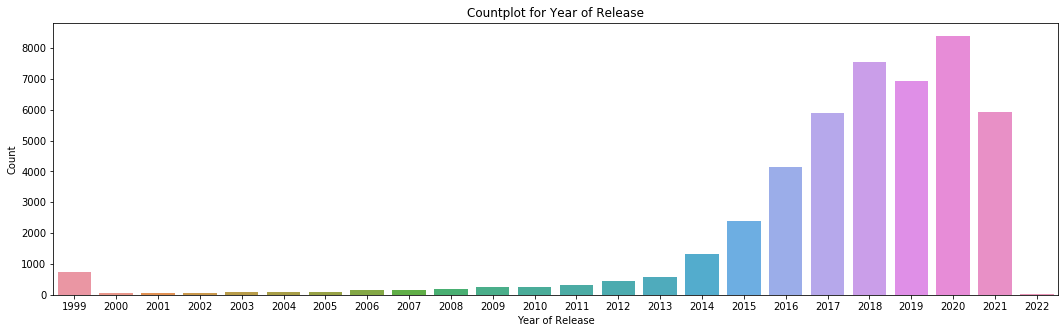

In [87]:
# Countplot of 'month_of_release'
plt.figure(figsize= (18,5))
sns.countplot(release_year)
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.title('Countplot for Year of Release')

In [828]:
# Note: 1. Column of 1999 represents all the games released on or before year 1999
#       2. Column of 2022 represents all the games scheduled to be released after year 2021

In [829]:
# Number of games released from 2000 to 2013 are in comparable range
# There is a significant increase in games release from 2013 to 2014
# Games released have increased at an exponential rate between 2014 and 2018
# There is a drop is game release from 2018 to 2019. Not enough data is available to know the exact reason for this drop 

In [88]:
# Calculating CAGR for games released between 2014 and 2018
len (games_data[games_data['year_of_release']==2014])

1317

In [89]:
len (games_data[games_data['year_of_release']==2018])

7558

In [90]:
CAGR = (7558/1317)*(0.25) - 1
CAGR

0.43470007593014426

# Games released have increased at a CAGR of 43.47% between 2014 and 2018

In [77]:
# Day of release

In [76]:
# 'day_of_release' has values from 1 to 31
# If 'day_of_release' = 0, that means data is not available

# Instead to taking each day, I will convert it into weeks

In [91]:
# Making bins and defining labels for days
bins = [ 0, 7, 14 , 28, 35]
labels = ['Week 1', 'Week 2', 'Week 3', 'Week 4' ]

In [92]:
week = pd.cut(games_data['day_of_release'] , bins=bins, labels= labels, include_lowest=True)

Text(0.5, 1.0, 'Countplot for Week of Release')

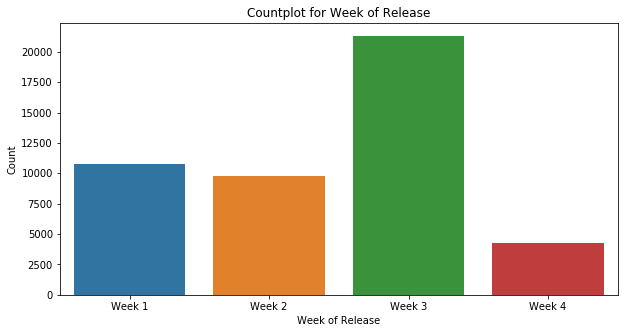

In [93]:
# Countplot of weeks
plt.figure(figsize= (10,5))
sns.countplot(week)
plt.xlabel('Week of Release')
plt.ylabel('Count')
plt.title('Countplot for Week of Release')

In [94]:
week.value_counts(normalize = True)

Week 3    0.462051
Week 1    0.232880
Week 2    0.212902
Week 4    0.092167
Name: day_of_release, dtype: float64

In [ ]:
# Significantly higher number of games are released in Week 3 as compared to all other weeks

# 46.26% of all games are released in Week 3

# 44.57% of all games are released in both Week 1 and Week 2 combined

In [ ]:
# The available data is not sufficient to know the exact cause of this observation

In [ ]:
### Genre

In [95]:
# Checking the 'genre' column
games_data['genre'].head(10)

0                       Action, Free to Play, Strategy
1                                 Action, Free to Play
2             Action, Adventure, Massively Multiplayer
3                                 Action, Free to Play
4       Action, Adventure, Casual, Free to Play, Indie
5                                 Action, Free to Play
6                                               Action
7                                    Action, Adventure
8                        Action, Adventure, Indie, RPG
9    Action, Adventure, Indie, Massively Multiplaye...
Name: genre, dtype: object

In [ ]:
# There are multiple tags within the genre column
# To make the data more redable, I will make list of genre for all games

In [96]:
games_data['genre_list'] = None

In [98]:
for i in range(len(games_data)):
    try:
        games_data.at[i,'genre_list'] = games_data.at[i,'genre'].split(', ')
    except:
        games_data.at[i,'genre_list'] = 'Null'

In [99]:
# Now I will store all the tags of genre in separate list
master_list_of_genre = []
for i in range(len(games_data)):
    master_list_of_genre.extend(games_data.at[i,'genre_list']) 

In [100]:
# Making a Dataframe
df_master_list_of_genre = pd.DataFrame(data= master_list_of_genre, columns = ['genre'])

In [101]:
# Checking the cumulative value counts of genres
df_master_list_of_genre['genre'].value_counts()

Indie                    32731
Action                   19702
Casual                   17905
Adventure                17385
Strategy                  8972
Simulation                8884
RPG                       7742
Early Access              5146
Free to Play              3411
Sports                    2246
Racing                    1745
Massively Multiplayer     1323
Utilities                  598
l                          464
Design & Illustration      367
Animation & Modeling       296
Education                  286
u                          232
N                          232
Video Production           229
Audio Production           172
Software Training          148
Game Development           126
Photo Editing               96
Web Publishing              82
Violent                     56
Gore                        29
Nudity                      15
Accounting                  14
Sexual Content              13
Movie                        2
Short                        1
Tutorial

In [853]:
# There are genres such as 'Episodic' , 'Tutorial' , 'Short', '360 V' and 'Documentary' which have only 1 count

# So, I will only consider genre tags above 'Massively Multiplayer' 
# As 'Massively Multiplayer' represents 1% of all the genre tags 

In [102]:
# Making a list of most frequent genres till 'Massively Multiplayer'
list_of_genre = list(df_master_list_of_genre['genre'].value_counts().nlargest(12).index)
list_of_genre

['Indie',
 'Action',
 'Casual',
 'Adventure',
 'Strategy',
 'Simulation',
 'RPG',
 'Early Access',
 'Free to Play',
 'Sports',
 'Racing',
 'Massively Multiplayer']

In [103]:
# Since 'Free to Play' is not exactly game genre, I will remove it
list_of_genre.remove('Free to Play')
list_of_genre

['Indie',
 'Action',
 'Casual',
 'Adventure',
 'Strategy',
 'Simulation',
 'RPG',
 'Early Access',
 'Sports',
 'Racing',
 'Massively Multiplayer']

In [104]:
# In the 'games_data' I will create new columns for each of 12 genres
for genre in list_of_genre:
    games_data[genre] = 0

In [105]:
# I will also create a column 'free_to_play'
# Its value will be 1 if game is free to play
# Otherwise, Its value will be 0 if game is paid
games_data['free_to_play'] =0

In [106]:
# Checking the columns of games_data
games_data.columns

Index(['appid', 'name', 'developer', 'publisher', 'positive', 'negative',
       'owners', 'median_forever', 'price', 'initialprice', 'discount', 'ccu',
       'languages', 'genre', 'tags', 'date_of_release', 'day_of_release',
       'month_of_release', 'year_of_release', 'positive_percent', 'genre_list',
       'Indie', 'Action', 'Casual', 'Adventure', 'Strategy', 'Simulation',
       'RPG', 'Early Access', 'Sports', 'Racing', 'Massively Multiplayer',
       'free_to_play'],
      dtype='object')

In [107]:
# Based on 'genre_list', I will fill out all the genre columns of games_data
# For example, if 'genre_list' = ['Action', 'Strategy'] then the column of Action and Strategy both will have values of 1


# Also filing 'free_to_play' column
# Its value will be 1 if game is free to play
# Otherwise, Its value will be 0 if game is paid

for i in range(len(games_data)):
    if 'Free to Play' in games_data.at[i,'genre_list']:
        games_data.at[i,'free_to_play'] = 1
    for genre in list_of_genre:
        if genre in games_data.at[i,'genre_list']:
            games_data.at[i,genre] = 1

In [108]:
# checking the first 5 rows of dataframe
games_data.head(5)

,appid,name,developer,publisher,positive,negative,owners,median_forever,price,initialprice,...,Casual,Adventure,Strategy,Simulation,RPG,Early Access,Sports,Racing,Massively Multiplayer,free_to_play
0,570,Dota 2,Valve,Valve,1311073,250492,100 mil to 200 mil,1004,0.00,0.0,...,0,0,1,0,0,0,0,0,0,1
1,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,5164509,698131,50 mil to 100 mil,7438,0.00,0.0,...,0,0,0,0,0,0,0,0,0,1
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",998442,822166,50 mil to 100 mil,10826,29.99,2999.0,...,0,1,0,0,0,0,0,0,1,0
3,440,Team Fortress 2,Valve,Valve,758302,50533,50 mil to 100 mil,365,0.00,0.0,...,0,0,0,0,0,0,0,0,0,1
4,304930,Unturned,Smartly Dressed Games,Smartly Dressed Games,410378,38733,20 mil to 50 mil,334,0.00,0.0,...,1,1,0,0,0,0,0,0,0,1


In [109]:
# Checking the top genre for all games
for genre in list_of_genre:
    print(genre,":", games_data[genre].sum())

Indie : 32731
Action : 19702
Casual : 17905
Adventure : 17385
Strategy : 8972
Simulation : 8884
RPG : 7742
Early Access : 5146
Sports : 2246
Racing : 1745
Massively Multiplayer : 1323


# Top 5 genre for all games are: 

# 1. 'Indie' 

# 2. 'Action'

# 3. 'Casual'

# 4. 'Adventure' 

# 5. 'Strategy' 

In [110]:
# Splitting the games_data into 2 dataframes

# First dataframe will have data of free to play games
games_data_free_to_play = games_data[games_data['free_to_play']==1]

# Second dataframes will have data of paid games
games_data_paid_games = games_data[games_data['free_to_play']==0]

In [111]:
# Checking the top genre for free to play games
for genre in list_of_genre:
    print(genre,":", games_data_free_to_play[genre].sum())

Indie : 2260
Action : 1437
Casual : 1415
Adventure : 1089
Strategy : 799
Simulation : 651
RPG : 776
Early Access : 472
Sports : 196
Racing : 131
Massively Multiplayer : 632


In [112]:
# Checking the top genre for paid games
for genre in list_of_genre:
    print(genre,":", games_data_paid_games[genre].sum())

Indie : 30471
Action : 18265
Casual : 16490
Adventure : 16296
Strategy : 8173
Simulation : 8233
RPG : 6966
Early Access : 4674
Sports : 2050
Racing : 1614
Massively Multiplayer : 691


# Top 5 genre for both free-to-play games and paid games are same

# Top 5 genre for both are: 

# 1. 'Indie' 

# 2. 'Action'

# 3. 'Casual'

# 4. 'Adventure' 

# 5. 'Strategy' 

In [113]:
# Checking the % of games for each genre in free to play category
for genre in list_of_genre:
    print(genre,":", round(games_data_free_to_play[genre].sum()/len(games_data_free_to_play),2))

Indie : 0.66
Action : 0.42
Casual : 0.41
Adventure : 0.32
Strategy : 0.23
Simulation : 0.19
RPG : 0.23
Early Access : 0.14
Sports : 0.06
Racing : 0.04
Massively Multiplayer : 0.19


In [114]:
# Checking the % of games for each genre in paid category
for genre in list_of_genre:
    print(genre,":", round(games_data_paid_games[genre].sum()/len(games_data_paid_games),2))

Indie : 0.71
Action : 0.43
Casual : 0.39
Adventure : 0.38
Strategy : 0.19
Simulation : 0.19
RPG : 0.16
Early Access : 0.11
Sports : 0.05
Racing : 0.04
Massively Multiplayer : 0.02


# 19% of Free-to-play category have Massively Multiplayer genre
# Whereas only 2% of Paid games have Massively Multiplayer genre 

# Percent of 'Indie', 'RPG' and 'Adventure' genres are different between         free-to-play and paid games

In [115]:
# As seen above in year of release, there is exponential growth in games from 2014 to 2018

# So checking the trend of genres from 2014 to 2020
genre_year_trend = games_data[(games_data['year_of_release']>2013) & (games_data['year_of_release']<2021) ]

In [116]:
genre_year_trend.groupby('year_of_release')[list_of_genre].apply(lambda x : x.astype(int).sum())

,Indie,Action,Casual,Adventure,Strategy,Simulation,RPG,Early Access,Sports,Racing,Massively Multiplayer
year_of_release,,,,,,,,,,,
2014,884,568,345,461,279,191,263,56,58,47,35
2015,1777,1080,689,928,510,403,476,166,92,86,58
2016,2925,1796,1558,1514,753,780,578,395,225,147,119
2017,4225,2578,2346,2220,1046,1109,836,602,333,213,171
2018,5759,3171,3312,2714,1335,1520,1156,814,397,281,224
2019,5253,2960,2771,2744,1351,1361,1297,877,345,267,235
2020,6340,3655,3568,3333,1689,1731,1509,1174,403,295,253


In [117]:
genre_trend = genre_year_trend.groupby('year_of_release')[list_of_genre].apply(lambda x : x.astype(int).sum())

In [118]:
# Now assuming year 2014 as baseline, 
# I can divide all Indie values by Indie value of year 2014
# This will give me the growth over years

# Doing this for all the genres
round(genre_trend.div(genre_trend.iloc[0]),2)

,Indie,Action,Casual,Adventure,Strategy,Simulation,RPG,Early Access,Sports,Racing,Massively Multiplayer
year_of_release,,,,,,,,,,,
2014,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2015,2.01,1.90,2.00,2.01,1.83,2.11,1.81,2.96,1.59,1.83,1.66
2016,3.31,3.16,4.52,3.28,2.70,4.08,2.20,7.05,3.88,3.13,3.40
2017,4.78,4.54,6.80,4.82,3.75,5.81,3.18,10.75,5.74,4.53,4.89
2018,6.51,5.58,9.60,5.89,4.78,7.96,4.40,14.54,6.84,5.98,6.40
2019,5.94,5.21,8.03,5.95,4.84,7.13,4.93,15.66,5.95,5.68,6.71
2020,7.17,6.43,10.34,7.23,6.05,9.06,5.74,20.96,6.95,6.28,7.23


# For the time span of 2014 to 2020 (taking 2014 as baseline):

# 1. All genre categories have increased in the time span 

# 2. Most significance increase is for 'Early Access' genre. This genre has increased 20.96 times

# 3. Number of 'Casual' games released has increased 10.34 times 

# 4. Number of 'Simulation' games released has increased 9.06 times

# 5. Except 'Early Access' , 'Casual' and 'Simulation', all other genres have increased by average 6.5 times

In [119]:
genre_year_trend =round(genre_trend.div(genre_trend.iloc[0]),2)

Text(0.5, 1.0, 'Growth of Genre with year')

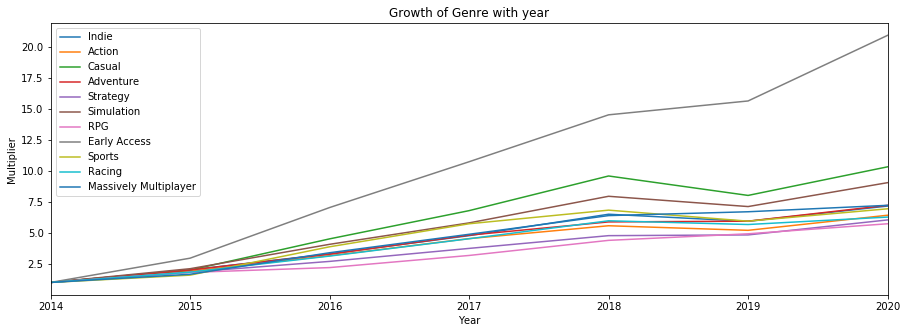

In [120]:
# Plotting Growth of Genre with year
genre_year_trend.plot(figsize= (15,5))
plt.xlabel('Year')
plt.ylabel('Multiplier')
plt.title('Growth of Genre with year')

In [ ]:
####### LAST LINE ####### 